This notebook calculates Pi to 1000 decimal places using the algorithm of Ramanujan (1914), which can be found here: https://en.wikipedia.org/wiki/Ramanujan–Sato_series

The code makes use of several Python libraries, most importantly the decimal library which allows for "bignum" decimal representations to arbitrary precision.

We will also compare to the true value of Pi to 1000 decimal places, at each iteration of the series, and plot those results to understand the scaling behaviour.

In [1]:
from scipy.special import factorial
import decimal
import matplotlib.pyplot as plt

Next, we define the decimal precision (number of decimal places + 1 in this case ... Pi to 1000 decimals corresponds to 1001 significant figures).  We also define two arrays to hold the iteration number and the difference between the current value of Pi and the true value.

In [2]:
decimal.getcontext().prec = 1001
x = [decimal.Decimal(0) for i in range(0,400)]
y = [decimal.Decimal(0) for i in range(0,400)]

We record the true value of Pi to 1000 decimal places.

In [3]:
PiDigs = decimal.Decimal(31415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679821480865132823066470938446095505822317253594081284811174502841027019385211055596446229489549303819644288109756659334461284756482337867831652712019091456485669234603486104543266482133936072602491412737245870066063155881748815209209628292540917153643678925903600113305305488204665213841469519415116094330572703657595919530921861173819326117931051185480744623799627495673518857527248912279381830119491298336733624406566430860213949463952247371907021798609437027705392171762931767523846748184676694051320005681271452635608277857713427577896091736371787214684409012249534301465495853710507922796892589235420199561121290219608640344181598136297747713099605187072113499999983729780499510597317328160963185950244594553469083026425223082533446850352619311881710100031378387528865875332083814206171776691473035982534904287554687311595628638823537875937519577818577805321712268066130019278766111959092164201984)

Pi = PiDigs/(10**1000)
print ("True value = ",Pi,"\n")

True value =  3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067982148086513282306647093844609550582231725359408128481117450284102701938521105559644622948954930381964428810975665933446128475648233786783165271201909145648566923460348610454326648213393607260249141273724587006606315588174881520920962829254091715364367892590360011330530548820466521384146951941511609433057270365759591953092186117381932611793105118548074462379962749567351885752724891227938183011949129833673362440656643086021394946395224737190702179860943702770539217176293176752384674818467669405132000568127145263560827785771342757789609173637178721468440901224953430146549585371050792279689258923542019956112129021960864034418159813629774771309960518707211349999998372978049951059731732816096318595024459455346908302642522308253344685035261931188171010003137838752886587533208381420617177669147303598253490428755468731159562863882353787593751957781857780532171226806613001927876611

Now, we define the various constants used in the Ramanujan formula ... note in particular that we must use the decimal library's implementation of "sqrt", as neither the native Python nor even the numpy versions have the required precision.

In [4]:
a = decimal.Decimal(26390)
b = decimal.Decimal(1103)
d = decimal.Decimal(8).sqrt()
e = decimal.Decimal(9801)

We now loop over iteration number, and calculate at each iteration the next term in the sum.  We keep track of the value of the sum, and the value of Pi, at each iteration (though of course the latter is not really necessary, but was useful for debugging :)  The choice of 126 iterations is the exact number required to generate Pi accurately to 1000 decimal places.

In [5]:
pisum = decimal.Decimal(0)
for i in range(10):
    term1 = decimal.Decimal(factorial(4*i,exact=True))
    term2 = decimal.Decimal(pow(factorial(i,exact=True),4))
    term3 = decimal.Decimal(term1/term2*(a*decimal.Decimal(i)+b)/decimal.Decimal(396**(4*i)))
    pisum = pisum + term3
    pitemp1 = pisum*d/e
    pitemp = decimal.Decimal(1)/pitemp1
    pidiff = abs(pitemp-Pi)
    x.append(i)
    y.append(-decimal.Decimal(1.0)*decimal.Decimal(pidiff).log10())

print(pitemp)


3.14159265358979323846264338327950288419716939937510582097494459230781640628620904254280801827889659393971669604561881324230808901056524614309530516416354930266138651333390630918585217302848916010081058269194662026618204581255872925094693532067070352166034826682136727972226815493634758068134164569880625215024155764985024965484614710635212064351149019741561357550062456924544161754782718356730534302023435998050419800655882243374981504466524568456550422141561207591098839149147284325891416505637169237694708249609998557704506756621205051416181252624192899241471293368390793254316695146443633364360981315334886011262703402473086729646428531593780459356082363419764569740132654342055714281791022919525034911572267672303622250114706006747294327878777026300211639451675750126678992142483935470844084010369325568315978530522961872236274831155408132284112694518350832186229960515943617584099985109904511250807526143859467569419195255311751634350606502507875105174610539692277440688501240689158729534403674

Finally, we plot the results.

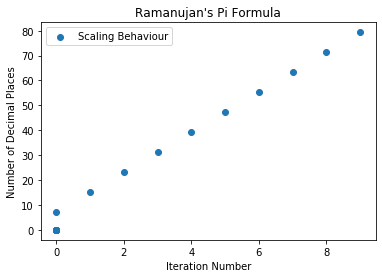

In [6]:
plt.scatter(x,y,label='Scaling Behaviour')
plt.xlabel('Iteration Number')
plt.ylabel('Number of Decimal Places')
plt.title("Ramanujan's Pi Formula")
plt.legend()
plt.show()


It would appear that beyond iteration 2 or 3, the scaling is completely linear, and we gain 8 new digits of Pi at each iteration.